In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.formula.api import ols
from statsmodels.api import qqplot, add_constant
import statsmodels.formula.api as smf
from statsmodels.tools.eval_measures import rmse  # 추정의 표준오차
%matplotlib inline

from sklearn.tree import export_graphviz
import graphviz

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV   # cross validation(구버전)

import warnings
import matplotlib as mp
import matplotlib.font_manager as fm
warnings.filterwarnings('ignore')
font_location = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_name = fm.FontProperties(fname = font_location).get_name()
mp.rc('font',family= font_name)

In [7]:
df_raw = pd.read_csv("/home/pirl/Downloads/BigDataAnalysis/체질검사.csv", engine = "python")
df_raw.head()

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
0,35.2,46,363.15,72.25,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4
1,11.8,27,168.00,71.25,38.1,93.0,79.1,94.5,57.3,36.2,24.5,29.0,30.0,18.8
2,22.2,69,177.75,68.50,38.7,102.0,95.0,98.3,55.0,38.3,21.8,30.8,25.7,18.8
3,10.6,57,147.75,65.75,35.2,99.6,86.4,90.1,53.0,35.0,21.3,31.7,27.3,16.9
4,47.5,51,219.00,64.00,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4


In [17]:
# 목표변수, 설명변수 데이터 지정
df_raw_y = df_raw["FAT"]
df_raw_x = df_raw.drop("FAT", axis= 1, inplace = False)

In [18]:
# train_set_split(x:설명변수 데이터, Y: 목표변수 데이터, test_size=test 데이터 비율, random_state: random seed)
df_train_x, df_test_x, df_train_y, df_test_y= train_test_split(df_raw_x, df_raw_y, test_size=0.3, random_state=1234)
print("train data X size:{}".format(df_train_x.shape))
print("train data Y size:{}".format(df_train_y.shape))
print("test data X size:{}".format(df_test_x.shape))
print("test data Y size:{}".format(df_test_y.shape))

train data X size:(176, 13)
train data Y size:(176,)
test data X size:(76, 13)
test data Y size:(76,)


In [19]:
tree_uncustomized = DecisionTreeRegressor(random_state=1234)
tree_uncustomized.fit(df_train_x, df_train_y)
# Train 데이터 설명력
print("Score on training set: {:.3f}".format(tree_uncustomized.score(df_train_x, df_train_y)))
# test 데이터 설명력
print("Score on test set: {:.3f}".format(tree_uncustomized.score(df_test_x, df_test_y)))

Score on training set: 1.000
Score on test set: 0.295


In [20]:
#parameter 값 출력
tree_uncustomized

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=1234, splitter='best')

In [23]:
train_score=[]; test_score=[]
para_leaf=[n_leaf * 1 for n_leaf in range(1,20)]

for v_min_samples_leaf in para_leaf:
    tree = DecisionTreeRegressor(random_state = 1234, min_samples_leaf = v_min_samples_leaf)
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x, df_train_y))
    test_score.append(tree.score(df_test_x, df_test_y))
    
df_score_leaf = pd.DataFrame()
df_score_leaf["MinSamplesLeaf"]=para_leaf
df_score_leaf["TrainScore"]=train_score
df_score_leaf["TestScore"]=test_score

## for 문 띄어쓰기 주의!!

In [24]:
df_score_leaf.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,1,1.000,0.295
1,2,0.970,0.374
2,3,0.928,0.445
3,4,0.902,0.447
4,5,0.868,0.451
5,6,0.851,0.447
6,7,0.843,0.465
7,8,0.830,0.536
8,9,0.802,0.477
9,10,0.793,0.505


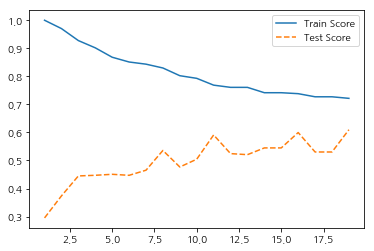

In [25]:
plt.plot(para_leaf,train_score,linestyle="-", label = "Train Score")
plt.plot(para_leaf,test_score,linestyle="--", label = "Test Score")
plt.legend()
# 차이가 가장 적으면서, 전체적으로 score가 높은 node 선정


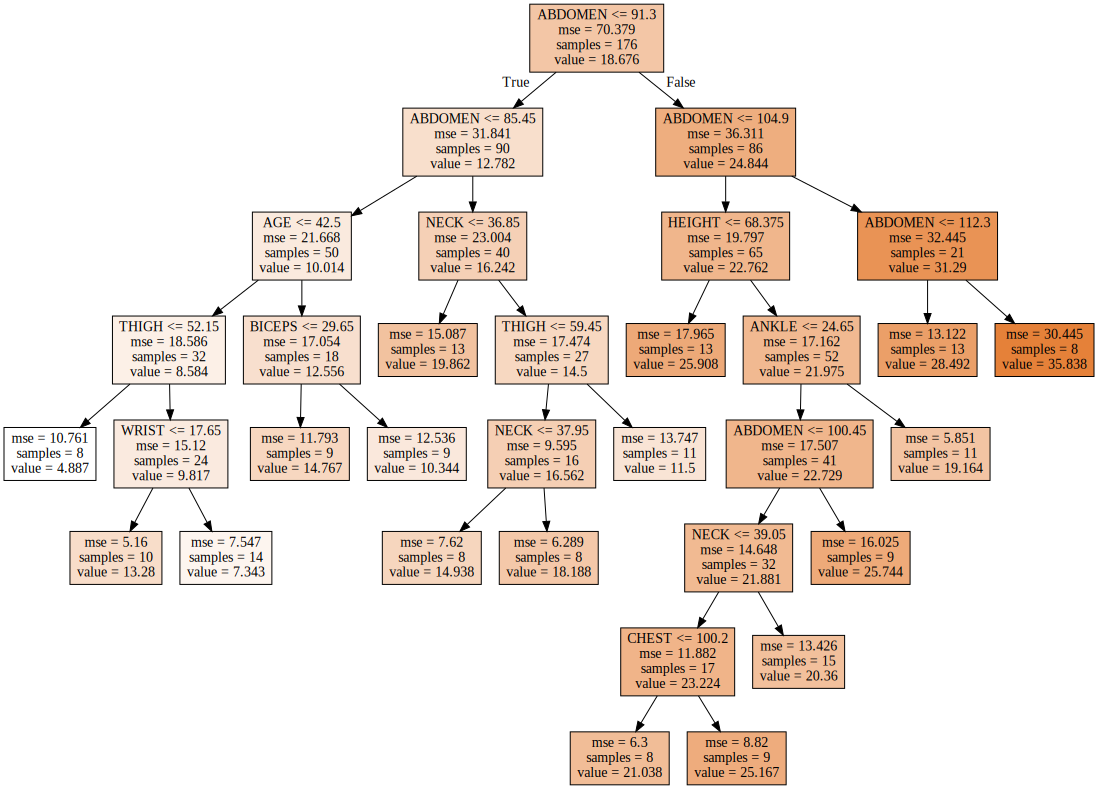

In [31]:
# p.164
v_feature_name = df_train_x.columns
tree_graph = DecisionTreeRegressor(random_state=1234, min_samples_leaf=8)
tree_graph.fit(df_train_x, df_train_y)
export_graphviz(tree_graph, out_file="tree_leaf.dot",feature_names=v_feature_name, impurity=True, filled=True)
with open("tree_leaf.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

# conda에서 graphviz 설치!!

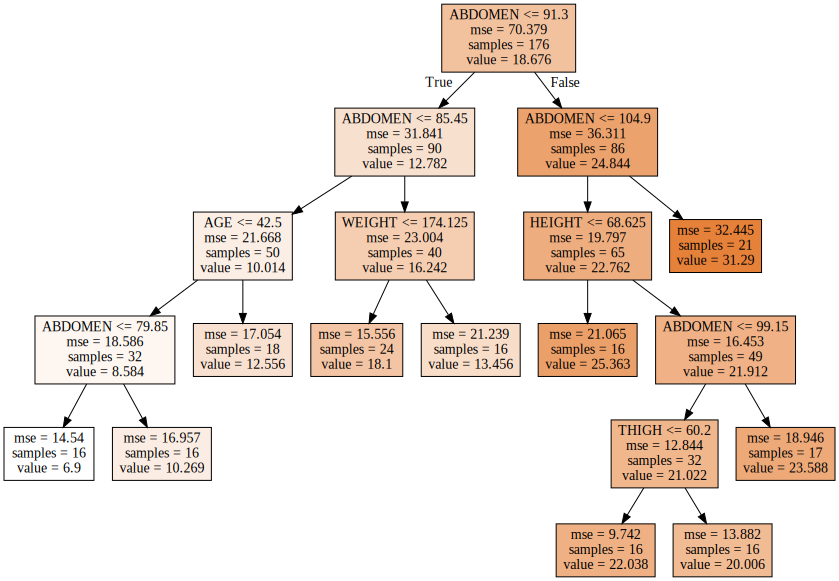

In [34]:
tree_graph = DecisionTreeRegressor(random_state=1234, min_samples_leaf=16)
tree_graph.fit(df_train_x, df_train_y)
export_graphviz(tree_graph, out_file="tree_leaf.dot", feature_names=v_feature_name, impurity = True, filled=True)
with open("tree_leaf.dot") as f:
    dot_graph=f.read()
display(graphviz.Source(dot_graph))

In [36]:
train_score = []; test_score = []
para_split = [n_split * 2 for n_split in range(8, 20)]

for v_min_samples_split in para_split:
    tree = DecisionTreeRegressor(random_state = 1234, min_samples_leaf=8, min_samples_split=v_min_samples_split)
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x,df_train_y))
    test_score.append(tree.score(df_test_x, df_test_y))
    
df_score_split = pd.DataFrame()
df_score_split["MinSamplesSplit"]=para_split
df_score_split["TrainScore"]=train_score
df_score_split["TestScore"]=test_score
df_score_split.round(3)

,MinSamplesSplit,TrainScore,TestScore
0,16,0.830,0.536
1,18,0.821,0.557
2,20,0.813,0.581
3,22,0.792,0.567
4,24,0.792,0.567
5,26,0.775,0.576
6,28,0.762,0.540
7,30,0.762,0.540
8,32,0.762,0.540
9,34,0.745,0.541


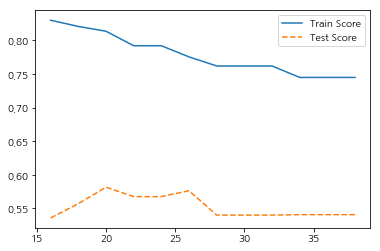

In [38]:
plt.plot(para_split,train_score,linestyle="-", label = "Train Score")
plt.plot(para_split,test_score,linestyle="--", label = "Test Score")
plt.legend()

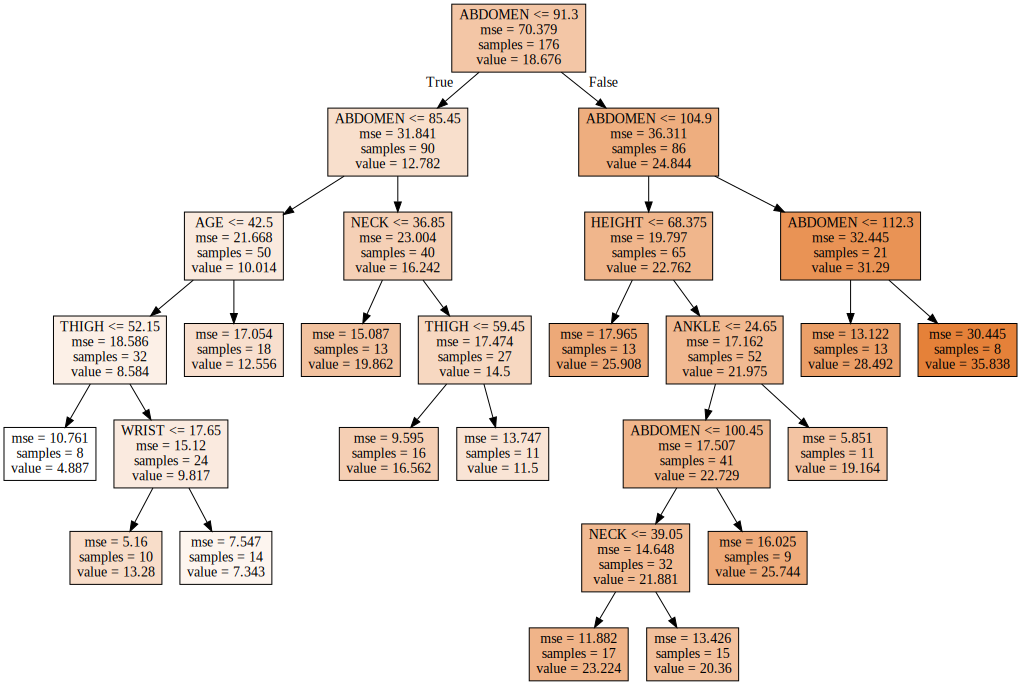

In [41]:
tree_graph = DecisionTreeRegressor(random_state = 1234, min_samples_leaf = 8, min_samples_split = 20)
tree_graph.fit(df_train_x, df_train_y)
export_graphviz(tree_graph, out_file="tree_leaf.dot", feature_names=v_feature_name, impurity = True, filled=True)
with open("tree_leaf.dot") as f:
    dot_graph=f.read()
display(graphviz.Source(dot_graph))

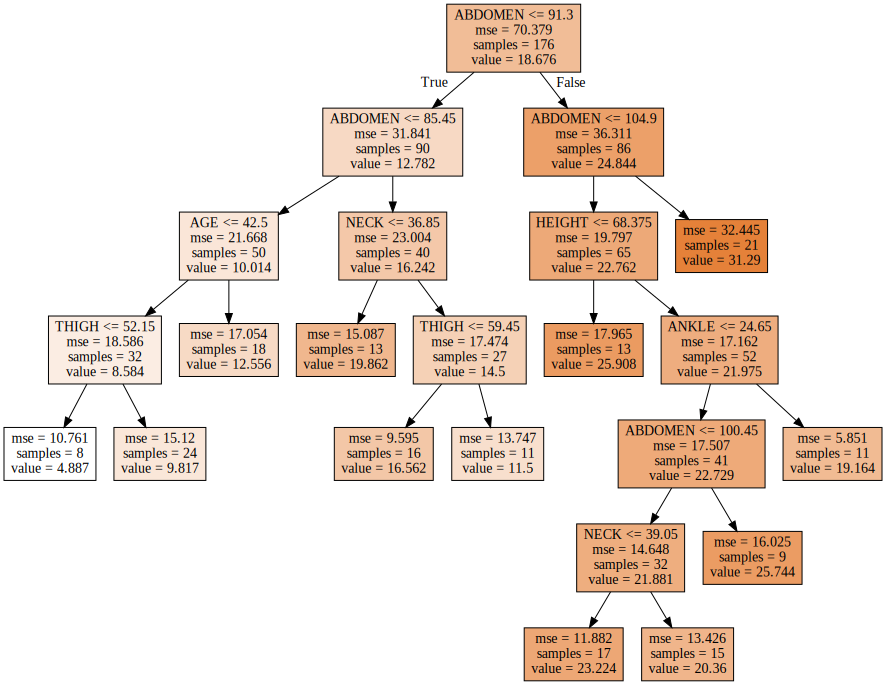

In [42]:
tree_graph = DecisionTreeRegressor(random_state = 1234, min_samples_leaf = 8, min_samples_split = 26)
tree_graph.fit(df_train_x, df_train_y)
export_graphviz(tree_graph, out_file="tree_leaf.dot", feature_names=v_feature_name, impurity = True, filled=True)
with open("tree_leaf.dot") as f:
    dot_graph=f.read()
display(graphviz.Source(dot_graph))

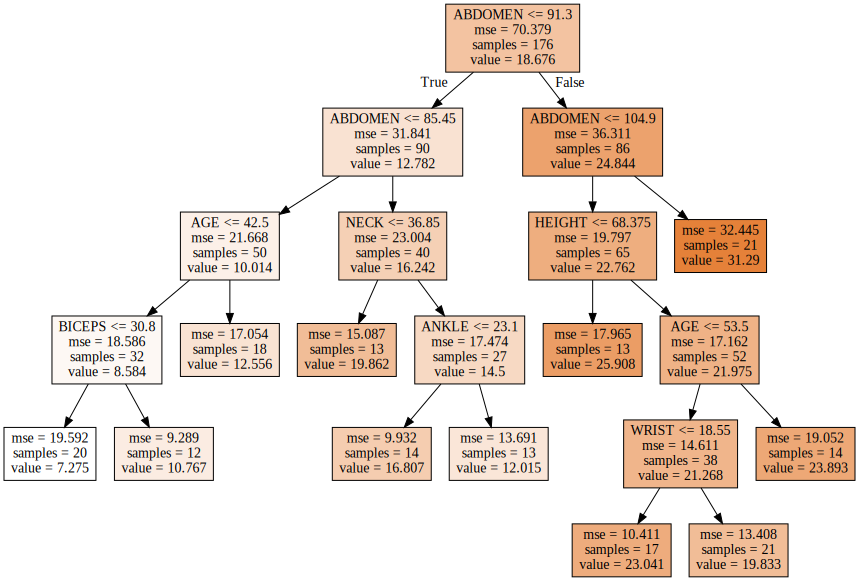

In [43]:
tree_graph = DecisionTreeRegressor(random_state = 1234, min_samples_leaf = 12, min_samples_split = 26)
tree_graph.fit(df_train_x, df_train_y)
export_graphviz(tree_graph, out_file="tree_leaf.dot", feature_names=v_feature_name, impurity = True, filled=True)
with open("tree_leaf.dot") as f:
    dot_graph=f.read()
display(graphviz.Source(dot_graph))

In [49]:
# 

train_score = []; test_score = []
# max_depth : 최대 깊이 변경
para_depth = [depth for depth in range(4,11)]

for v_max_depth in para_depth :
    tree = DecisionTreeRegressor(random_state = 1234, min_samples_leaf=8, min_samples_split = 20, max_depth = v_max_depth )
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x,df_train_y))
    test_score.append(tree.score(df_test_x, df_test_y))
    
df_score_depth = pd.DataFrame()
df_score_depth["Depth"]=para_depth
df_score_depth["TrainScore"]=train_score
df_score_depth["TestScore"]=test_score
df_score_depth.round(3)

,Depth,TrainScore,TestScore
0,4,0.783,0.570
1,5,0.808,0.581
2,6,0.813,0.581
3,7,0.813,0.581
4,8,0.813,0.581
5,9,0.813,0.581
6,10,0.813,0.581


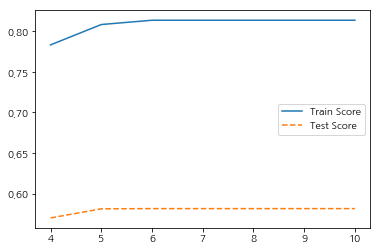

In [50]:
# 최대 깊이 증가에 따라 모델의 설명력은 증가
# Train/test 데이터의 성능 변화를 고려하여 4 선택
plt.plot(para_depth,train_score,linestyle="-", label = "Train Score")
plt.plot(para_depth,test_score,linestyle="--", label = "Test Score")
plt.legend()

위에서 leaf node = 8 / split node = 20 / depth = 5가 나왔지만, 최적은 아니다!!!

In [54]:
# p. 174

tree_final = DecisionTreeRegressor(min_samples_leaf=8, min_samples_split=20, max_depth = 5, random_state=1234)
tree_final.fit(df_train_x,df_train_y)

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=8,
           min_samples_split=20, min_weight_fraction_leaf=0.0,
           presort=False, random_state=1234, splitter='best')

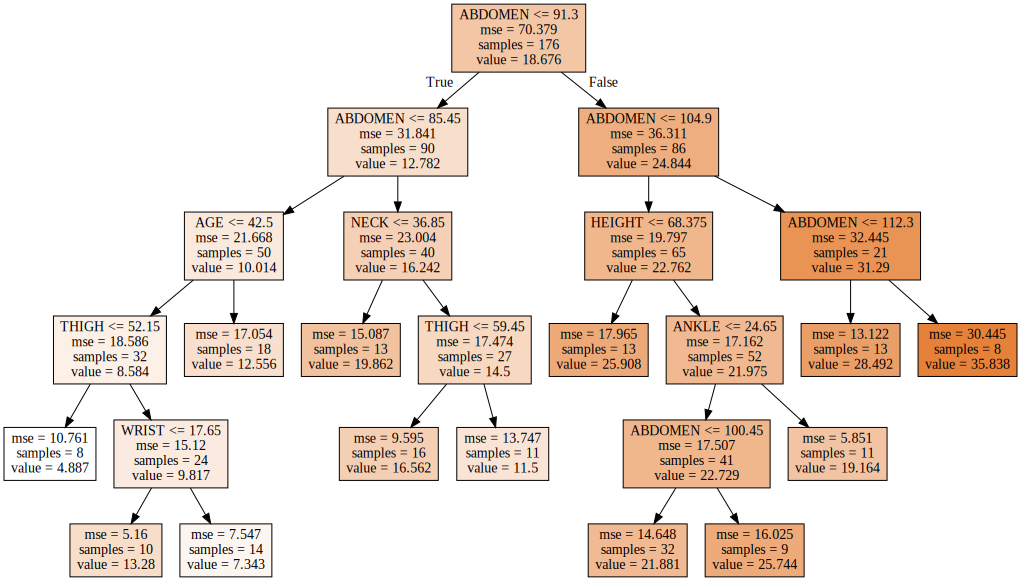

In [55]:
export_graphviz(tree_final, out_file="tree_final.dot", feature_names=v_feature_name, impurity = True, filled=True)
with open("tree_final.dot") as f:
    dot_graph=f.read()
display(graphviz.Source(dot_graph))

In [65]:
train_score_final=[]; test_score_final=[]

train_score_final.append(tree.score(df_train_x, df_train_y))
test_score_final.append(tree.score(df_test_x, df_test_y))
    
df_score_final = pd.DataFrame()
df_score_final["MinSamplesLeaf"]= [20]
df_score_final["TrainScore"]=train_score_final
df_score_final["TestScore"]=test_score_final

df_score_final.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,20,0.813,0.581


In [66]:
df_importance = pd.DataFrame()
df_importance["Feature"]=v_feature_name
df_importance["Importance"]=tree_final.feature_importances_

df_importance.sort_values("Importance",ascending=False, inplace=True)
df_importance.round(3)

,Feature,Importance
5,ABDOMEN,0.878
7,THIGH,0.031
3,NECK,0.025
12,WRIST,0.021
0,AGE,0.018
2,HEIGHT,0.016
9,ANKLE,0.011
1,WEIGHT,0.000
4,CHEST,0.000
6,HIP,0.000


Text(0, 0.5, '변수')

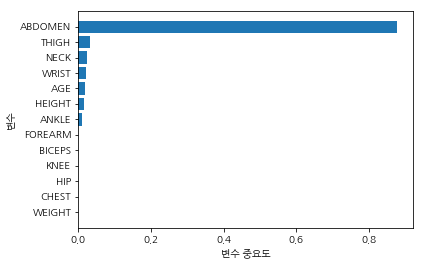

In [74]:
df_importance.sort_values("Importance",ascending = True, inplace = True)
coordinates=range(len(df_importance))
plt.barh(y=coordinates, width = df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("변수 중요도")
plt.ylabel("변수")

In [78]:
# p. 178
estimator = DecisionTreeRegressor()

param_grid = {"criterion":["mse", "friedman_mse","mae"],"max_features":["auto","sqrt","log2"], "max_depth":para_depth,"min_samples_split":para_split, "min_samples_leaf":para_leaf}

grid_dt = GridSearchCV(estimator, param_grid, scoring = "r2", n_jobs = -1)
grid_dt.fit(df_train_x, df_train_y)

print("best estimator model: \n{}".format(grid_dt.best_estimator_))
print("\nbest parameter: \n{}".format(grid_dt.best_params_))
print("\best score: \n{}".format(grid_dt.best_score_.round(3)))

best estimator model: 
DecisionTreeRegressor(criterion='mae', max_depth=4, max_features='auto',
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=17,
           min_samples_split=20, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

best parameter: 
{'criterion': 'mae', 'max_depth': 4, 'max_features': 'auto', 'min_samples_leaf': 17, 'min_samples_split': 20}
est score: 
0.636


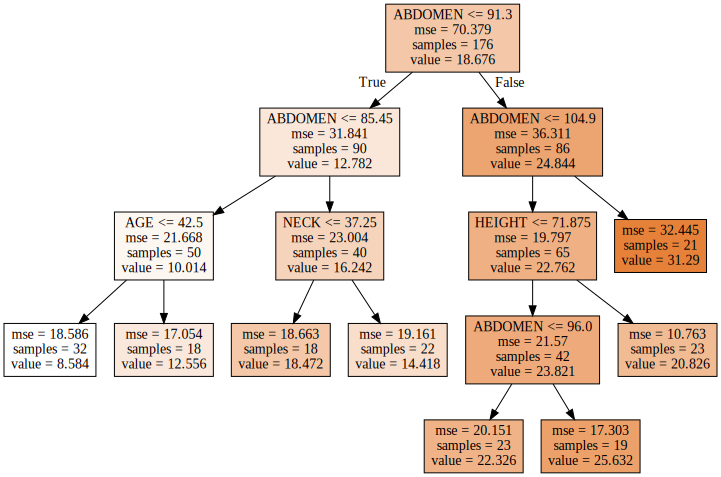

In [80]:
tree_final = DecisionTreeRegressor(min_samples_leaf=17, min_samples_split= 20, max_depth = 4, random_state=1234)
tree_final.fit(df_train_x,df_train_y)
export_graphviz(tree_final, out_file="tree_final.dot", feature_names=v_feature_name, impurity = True, filled=True)
with open("tree_final.dot") as f:
    dot_graph=f.read()
display(graphviz.Source(dot_graph))

In [82]:
train_score_final=[]; test_score_final=[]

train_score_final.append(tree_final.score(df_train_x, df_train_y))
test_score_final.append(tree_final.score(df_test_x, df_test_y))
    
df_score_final = pd.DataFrame()
df_score_final["MinSamplesLeaf"]= [17]
df_score_final["TrainScore"]=train_score_final
df_score_final["TestScore"]=test_score_final

df_score_final.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,17,0.727,0.53
